Course 2.1:  Seaborn
==================

### Links to resources:
- https://seaborn.pydata.org/
- Data Visualization with Python: Exploring Matplotlib, Seaborn, and Bokeh for Interactive Visualizations – Dr Pooja- 2023 - BPB Online LLP

# 1. General Overview

High level interface
- Based on MatplotLib
- Enables to create informative and attractive statistical graphics
- With minimum code

Convenient for complex databases with many variables

Vizualisation from matplotlib 
- Scatter plot
- Bar plot
- Line plot
- Box plot

enriched with visualization of categories

Specific complex plots
- Heat map
- Join plot
- Pair plot

Comes with several datasets

# 2. Importing seaborn

Check your installation, and install in necessary.

pip install seaborn

Then import following the usual convention : 


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# 3. Seaborn datasets

Seaborn provides several datasets to explore its functionnalities. 

In [2]:
# Obtain the list of the datasets 
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
# Load a dataset
tips=sns.load_dataset("tips")

tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# 4. Basic plots

## Bar plot

Usage
- Mean of a numerical variable for each category of categorical variable
- Visualize the distribution of data in categories


<Axes: xlabel='day', ylabel='total_bill'>

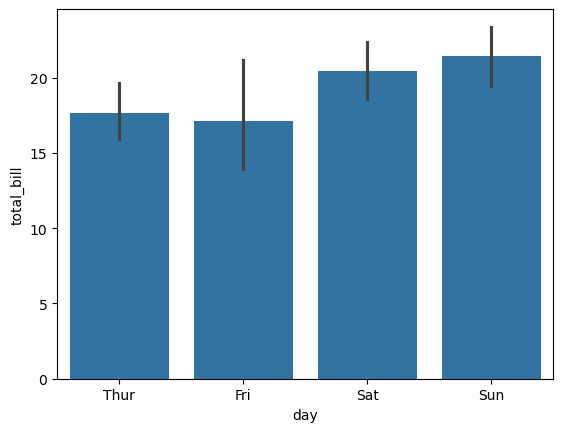

In [4]:
sns.barplot(x="day",y="total_bill", data = tips)


It can be customized with a color palette. 

Hue enables to separate data depending on a categorical variable.

ci= None removes error bars

It requires to use matplotlib to add labels.

Text(0, 0.5, 'Total Bill Amount ($)')

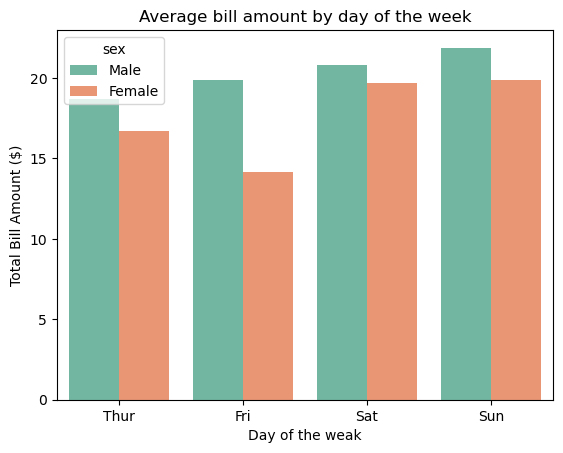

In [5]:
sns.barplot(x="day",y="total_bill", data = tips, errorbar=None, palette = "Set2", hue="sex")
plt.title('Average bill amount by day of the week')
plt.xlabel("Day of the weak")
plt.ylabel("Total Bill Amount ($)")


## Count plot

Usage: Count of observations in each categorical bin


Text(0, 0.5, 'Number of customers')

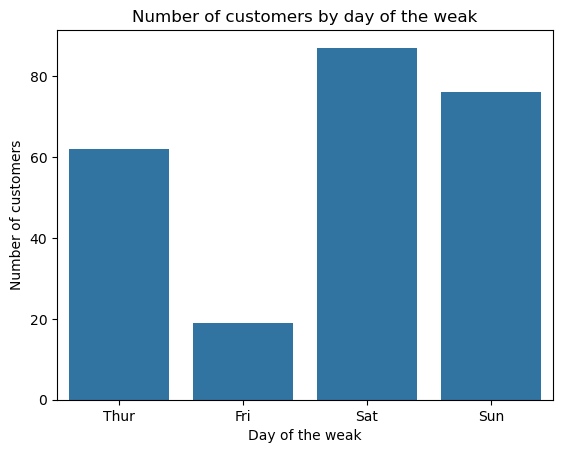

In [6]:
sns.countplot(x="day", data = tips)

plt.title('Number of customers by day of the weak')
plt.xlabel("Day of the weak")
plt.ylabel("Number of customers")



## Box plot

Usage:
- Summarizes the distribution of numerical variable for each category
- Shows the median, quartiles, outliers


Text(0, 0.5, 'Total bill amount ($)')

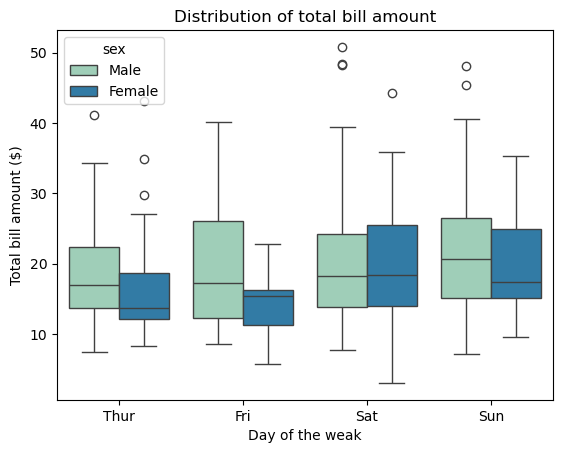

In [7]:
sns.boxplot(x="day", y="total_bill", data = tips, hue="sex", palette="YlGnBu")


plt.title('Distribution of total bill amount')
plt.xlabel("Day of the weak")
plt.ylabel("Total bill amount ($)")


## Violin Plot

Usage :
- Similar as box plot
- Also shows the density at different values


<Axes: xlabel='day', ylabel='total_bill'>

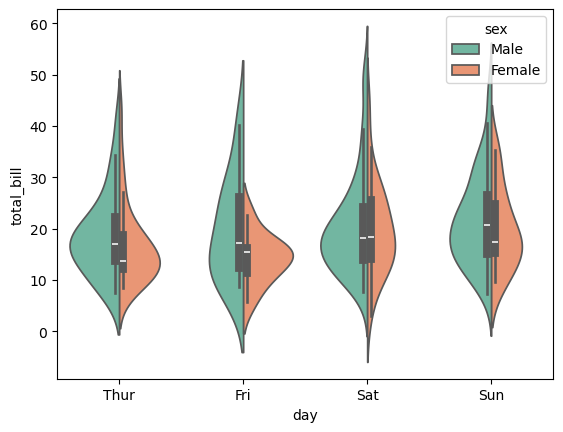

In [8]:
sns.violinplot(x="day", y="total_bill", data = tips, split=True, hue="sex",	palette="Set2")


## Line plot

Usage : relation between two numerical variables, by plotting them as connected line segments. 

<Axes: xlabel='day', ylabel='total_bill'>

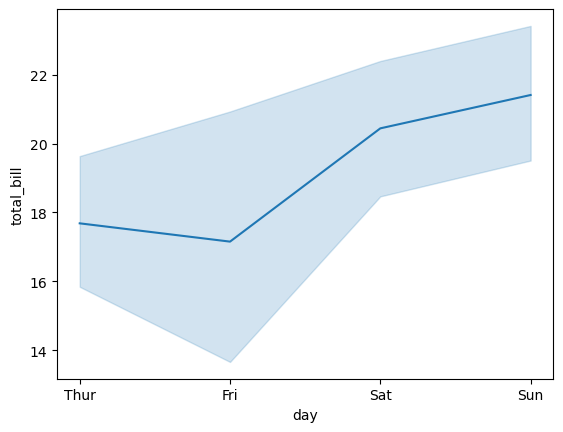

In [9]:
sns.lineplot(x="day",y="total_bill",data=tips)

Possible to separate categorical values


<Axes: xlabel='day', ylabel='total_bill'>

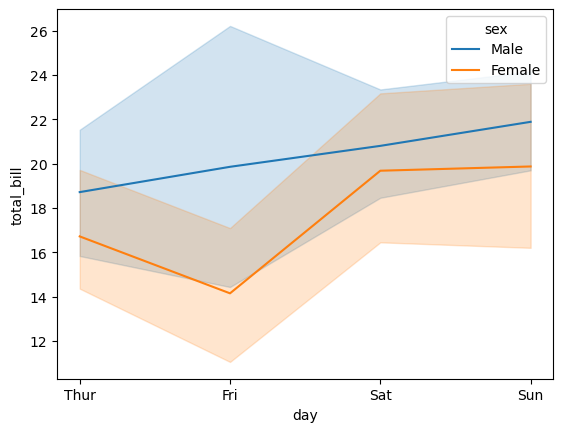

In [10]:
sns.lineplot(x="day",y="total_bill",data=tips, hue="sex")

# 5. Complex plot

## Join plot

A join is useful to study the relationship between two variables. 
It combines : 
- a scatter plot showing the relation between  the variables
- two histograms showing the distribution of the variables

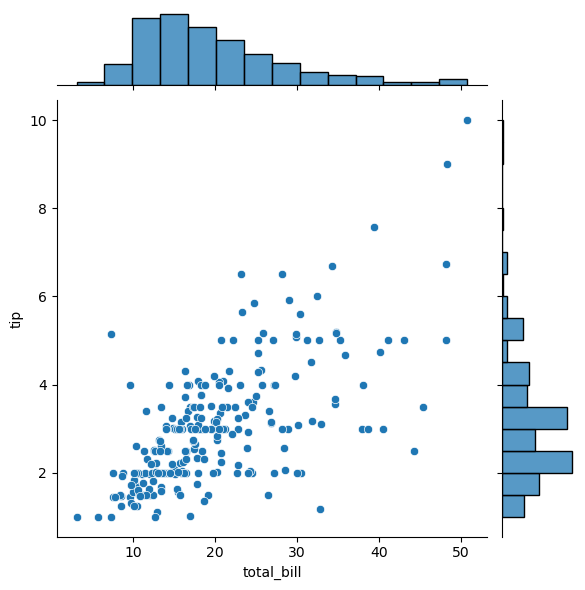

In [11]:
sns.jointplot(x="total_bill",y="tip",data=tips)

Automatically computes the regression line by adding the reg parameter

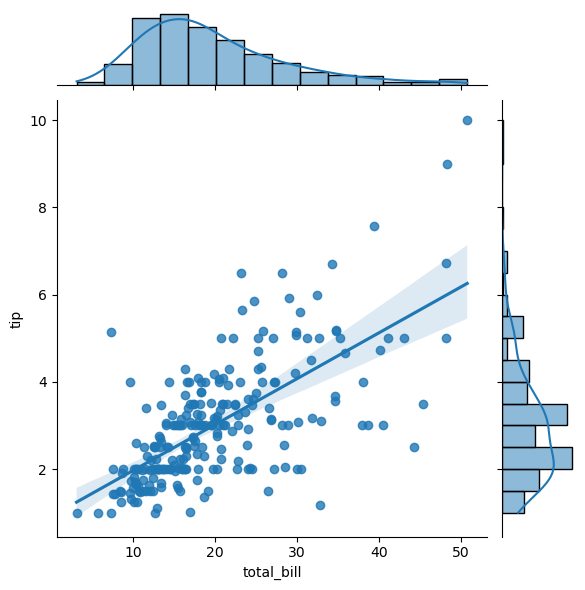

In [12]:
sns.jointplot(x="total_bill",y="tip",data=tips,kind="reg")

## Heatmap

A heatmap presents associate a scale of colors to the values

In [13]:
# Create a table to prepare data for the heatmap
table= tips.pivot_table(index='day', columns='time', values='total_bill', aggfunc='mean')

table

time,Lunch,Dinner
day,,
Thur,17.664754,18.780000
Fri,12.845714,19.663333
Sat,NaN,20.441379
Sun,NaN,21.410000


Text(0.5, 1.0, 'Average Total Bill Amounts by Day and Time')

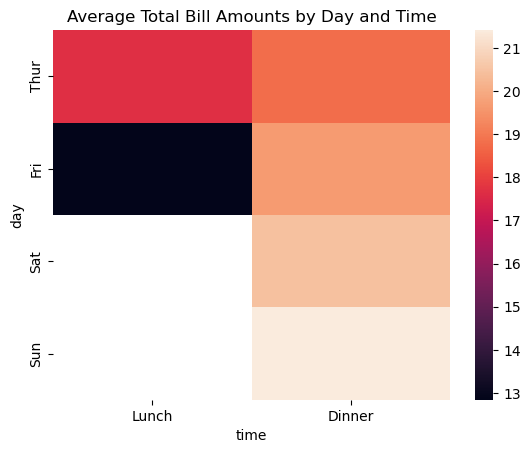

In [14]:
# Generate a heatmap with the pivot table
sns.heatmap(table,)

plt.title("Average Total Bill Amounts by Day and Time")

Add customization : color map, figure size, labels and their format, title

Text(0.5, 1.0, 'Average Total Bill Amounts by Day and Time')

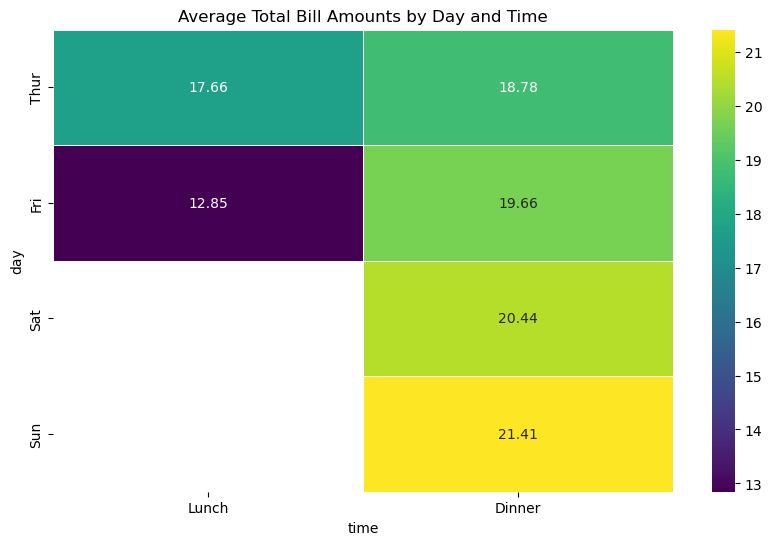

In [15]:
plt.figure(figsize=(10, 6))  # Set the figure size

sns.heatmap(table, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)

plt.title("Average Total Bill Amounts by Day and Time")


A heat map can also be used to see the correlation.

Text(0.5, 1.0, 'Correlation Heatmap of Tips Dataset')

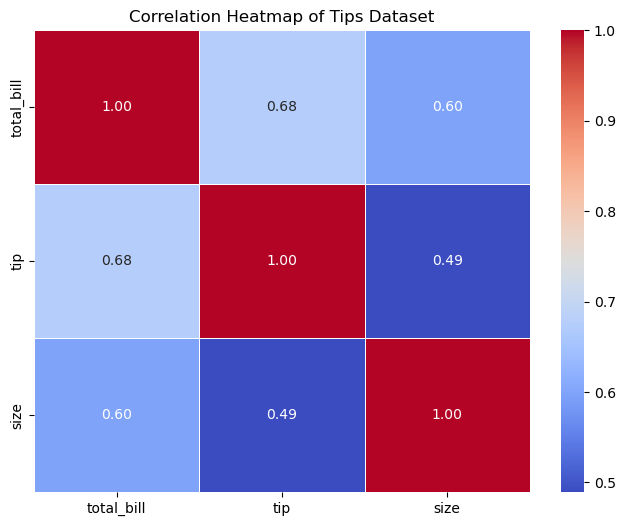

In [16]:
# Create a correlation matrix
correlation_matrix = tips.corr(numeric_only=True)

plt.figure(figsize=(8, 6)) 

# Generate a heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

plt.title("Correlation Heatmap of Tips Dataset")

## Pair plot

Pairplot visualizes every pairwise combination of variables simultaneously

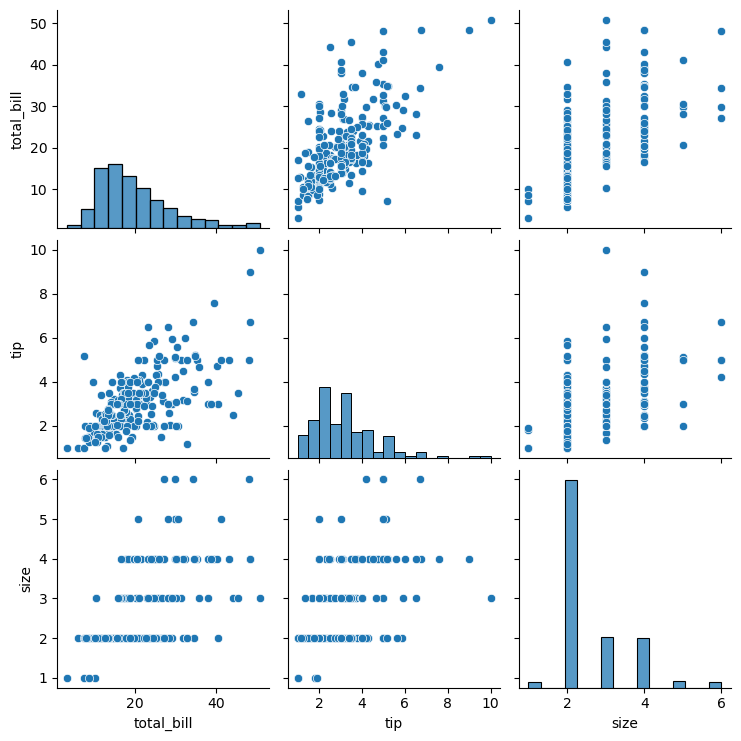

In [17]:
sns.pairplot(tips)


The pair plot displays scatter plots for all possible pairs of numerical features in the dataset, and it provides histograms along the diagonal.

A pairplot can be customized with a hue parameter, a palette, some marker shapes. 

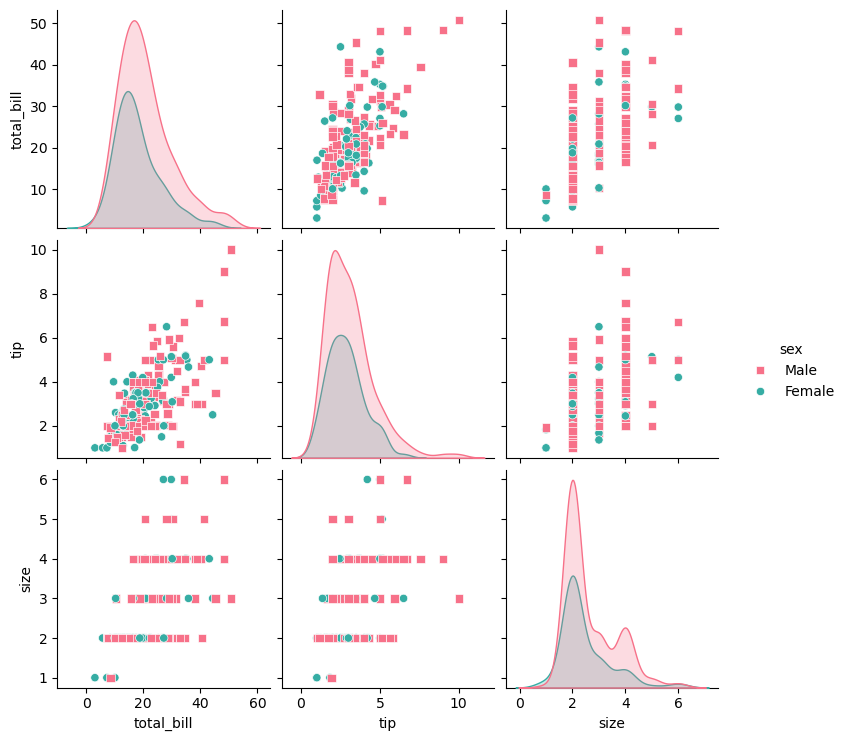

In [18]:
sns.pairplot(tips, hue="sex", markers=["s","o"],palette="husl")

Text(0, 0.5, 'body_mass_g')

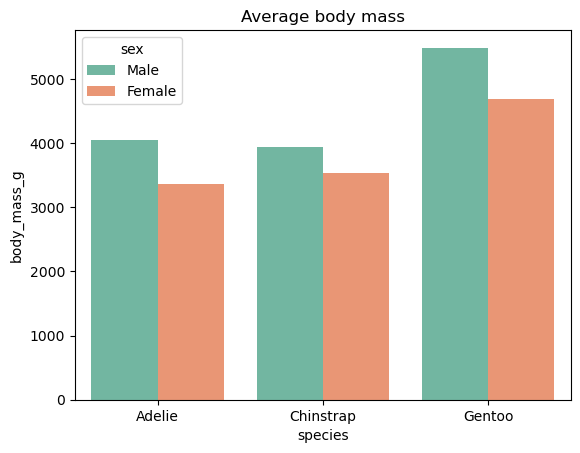

In [21]:
penguins = sns.load_dataset("penguins")
sns.barplot(x="species",y="body_mass_g", data = penguins, errorbar=None, palette = "Set2", hue="sex")
plt.title('Average body mass')
plt.xlabel("species")
plt.ylabel("body_mass_g")


<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

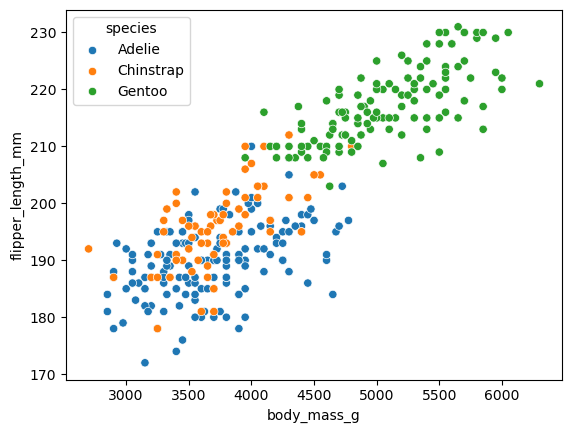

In [25]:
sns.scatterplot(x="body_mass_g", y="flipper_length_mm", data=penguins, hue='species')

<Axes: xlabel='species', ylabel='bill_depth_mm'>

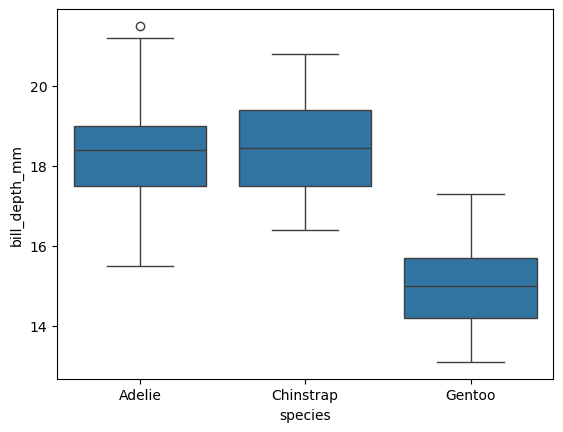

In [49]:
sns.boxplot(x="species", y="bill_depth_mm", data = penguins)


<Axes: xlabel='species', ylabel='bill_length_mm'>

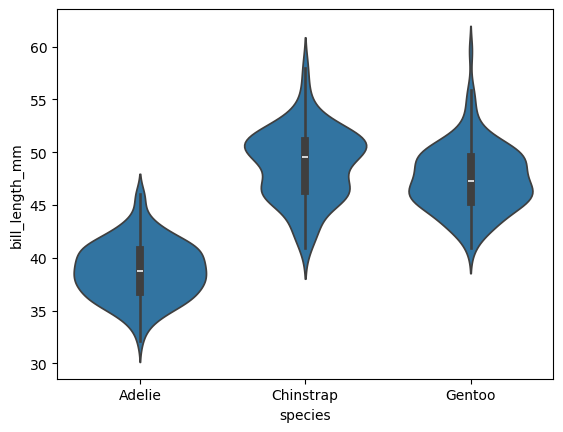

In [51]:
sns.violinplot(x="species", y="bill_length_mm", data = penguins)


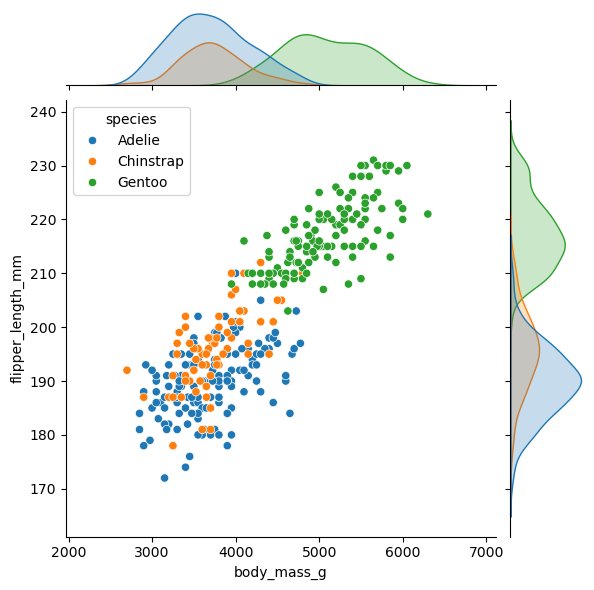

In [27]:
sns.jointplot(x="body_mass_g", y="flipper_length_mm", data=penguins, hue='species')

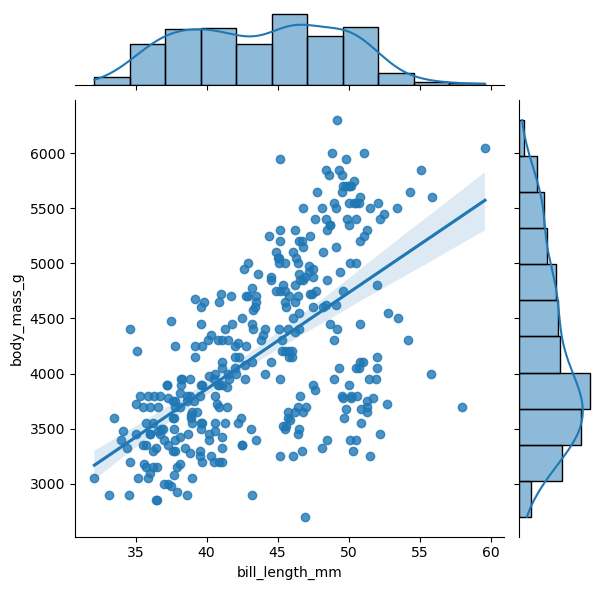

In [47]:
sns.jointplot(x="bill_length_mm",y="body_mass_g",data=penguins, kind="reg")

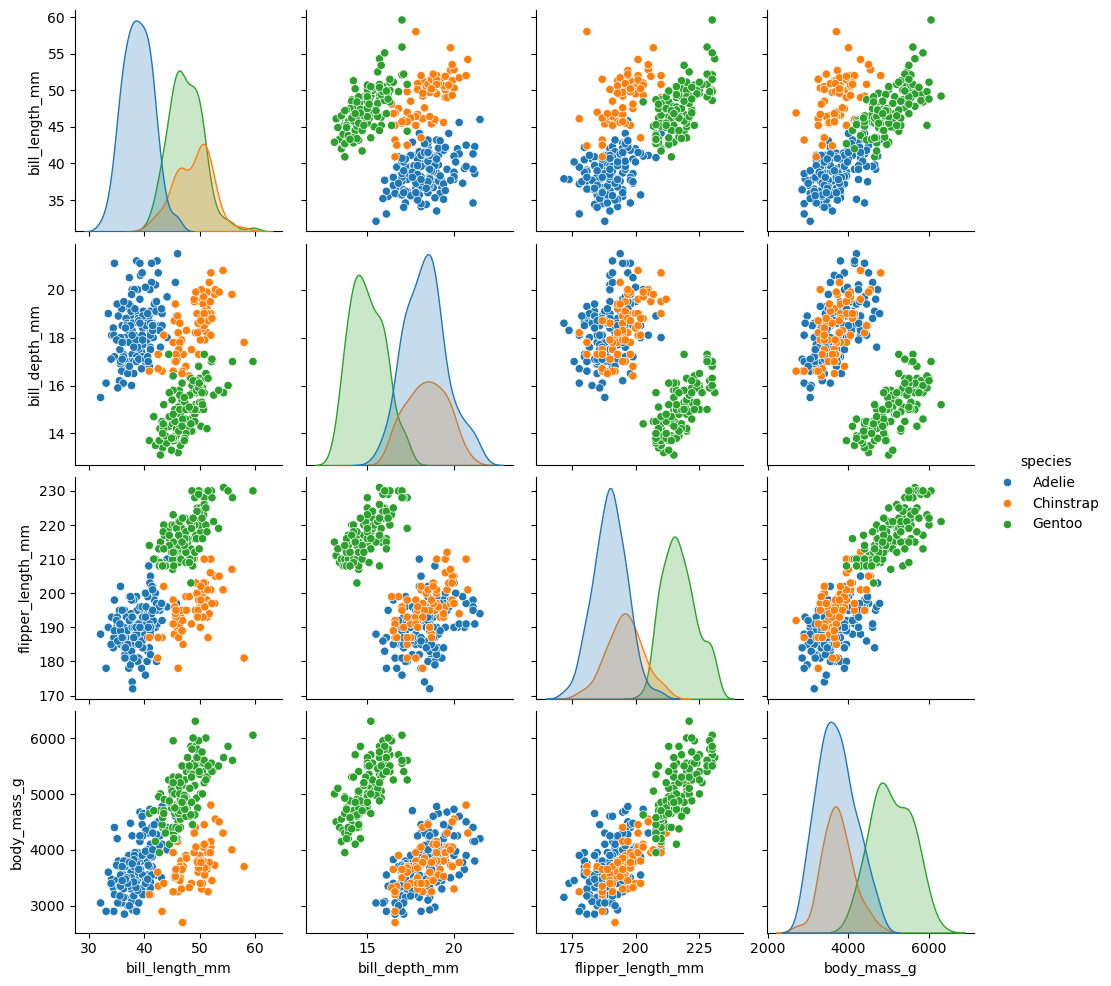

In [26]:
sns.pairplot(penguins, hue="species")

In [56]:
penguins_pivot = penguins.groupby(['species', 'island']).size().unstack()
penguins_pivot

island,Biscoe,Dream,Torgersen
species,,,
Adelie,44.0,56.0,52.0
Chinstrap,NaN,68.0,NaN
Gentoo,124.0,NaN,NaN


<Axes: xlabel='island', ylabel='species'>

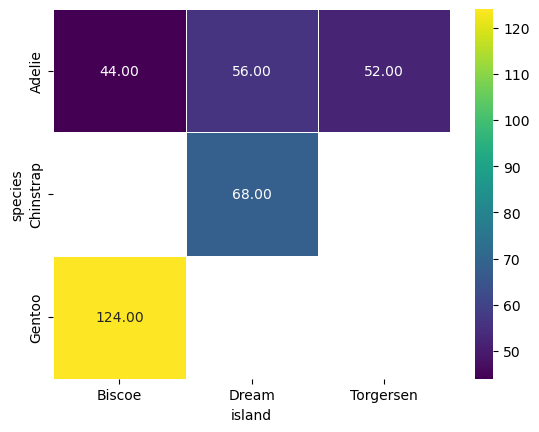

In [57]:
sns.heatmap(penguins_pivot, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)
